# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 6

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`.
* Дедлайн **17 апреля в 22:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb` и все фотографии, если пишете теоретическую часть от руки.
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.

-----

*Замечания.* Теоретические решения можно оформить
* в $\LaTeX$-формате в ноутбуке;
* написать от руки и прикрепить к ноутбуку;
* написать от руки и выслать боту.  

Во втором случае также **важно** "вшить" фото в ноутбук. Сделать это можно с помощью Edit -> Insert Image в Jupyter или с помощью кнопки "Вставить изображение" в Colab. Следите за размером итогового файла.

Фотографии принимаются только в хорошем качестве, **следите за освещением и почерком**. На фотографиях также указывайте номера задач.

-----

**Работа Закировой Марфы, Б06-907**

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import statsmodels as sts

import matplotlib.pyplot as plt
import seaborn as sns

red = '#FF3300'
blue = '#0099CC'
green = '#00CC66'

from statsmodels.sandbox.stats.multicomp import multipletests
from tqdm.notebook import tqdm

%matplotlib inline


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Критерии согласия

##Теоретическая часть



###Задача 1. (основной поток, 5 баллов)
 Компания по производству кормов для собак провела опрос $5000$ владельцев собак о том, какой корм предпочитают их питомцы. По результатам опроса оказалось, что $1010$ собак предпочитают корм со вкусом лосося, $2200$ &mdash; со вкусом курицы, $950$ &mdash; со вкусом говядины, а все остальные собаки предпочитают корм с овощами. Компания сделала предположение, что вероятности предпочтения кормов равны соответственно $\theta, 2\theta, \theta, 1-4\theta$,
	где $\theta\in(0,1/4)$. Верно ли данное предположение? Выпишите теоретические формулы и код для подсчета значения статистики и p-value  в `scipy`. Вычисление статистики и p-value можно выполнить в Питоне.


In [2]:
theta = 0.208
n_p = np.array([theta, 2*theta, theta, 1 - 4*theta]) * 5000
mu  = np.array([1010, 2200, 950, 840])
chi = np.sum((mu - n_p)**2/n_p)

chi_alfa = sps.chi2(df=2).ppf(0.95)
p_val  = sps.chi2(df = 2).sf(15.6)
print(f'chi = {round(chi,2)}')
print(f'chi_alfa = {round(chi_alfa,2)}')
print(f'p-value: {round(p_val,4)}')


chi = 15.58
chi_alfa = 5.99
p-value: 0.0004


**Результат статистически значим, отвергаем $H_0$**

## Практическая часть

При решении стоит использовать **готовые реализации критериев из** `scipy.stats`. При возникновении затруднений посмотрите в ноутбук с лекции 9.
________________
### Задача 2. (все потоки, 8 баллов)

С помощью критерия хи-квадрат вам нужно проверить, правильно ли `scipy.stats` генерирует случайные величины. 

**1.** Реализуйте критерий хи-квадрат для проверки корректности генерации выборки $U\{1, ..., 10\}$ (дискретное равномерное распределение). Тем самым проверьте, что `sps.randint` действительно генерирует выборку из равномерного распределения. Подберите размер выборки такой, чтобы выполнялись условия применимости критерия хи-квадрат. Поясните свой выбор.





$H_0: P = U\{1,\dots,10\}$

**требуется сгенерировать выборку по значениям sps.randint и проверить для нее критерий хи - квадрат**



In [159]:
len = 300 #выборка большая, элементов больше 50. В каждой корзине ожидается заведомо больше 5ти элементов: 30
k = 10 #количество корзин определяется областью значений дискретной величины

samples = sps.randint(low = 1, high = 11).rvs(size = len) #словарь вида значение из реализации: количество его повторений
values, mu = np.unique(samples, return_counts = True)  
p = 1/10
n_p = len * p
chi = sum((mu-n_p)**2/n_p)
chi_2_alfa = sps.chi2(df=k-1).ppf(0.95)
print(f'chi: {round(chi,2)}')
print(f'chi_2: {round(chi_2_alfa,2)}')
if chi < chi_2_alfa: 
  print('Не отвергаем')
else:
  print('Выборка не из равномерного')

chi: 11.53
chi_2: 16.92
Не отвергаем


**можно было проще:**

In [160]:
sps.chisquare(mu)

Power_divergenceResult(statistic=11.533333333333333, pvalue=0.2409136470358339)

**Аналогично получаем, что результат статистически не значим: p-value > $\alpha  = 0.05$, не отвергаем**

**2.** Проверьте, действительно ли код `sps.poisson(mu=5).rvs(size=1000)` генерирует выборку размера 1000 из пуассоновского распределения с параметром 5. 

**Указания**
1. Не забудьте учесть условия применимости критерия хи-квадрат;
2. Для вычисления дискретной плотности (вероятности) воспользуйтесь `sps.poisson(mu=5).pmf`;
3. Для подсчета количества элементов в разбиении на множества воспользуйтесь `np.unique(sample, return_counts=True)`;
4. Не нужно писать сколь-либо универсальный код, который одним нажатием кнопки проверяет гипотезу с учетом всех условий применимости критерия. Расписывайте код поэтапно, на каждый логический этап свой код в отдельной ячейке для *конкретной* реализации выборки. Так вам проще реализовать, а нам проще проверять.




**Хи - квадрат применим, если выборка достаточно большая и в каждой корзине ожидается не меньше 5ти элементов.**

**У нас выборка изначально состоит из 1000 элементов, но может оказаться что по корзинам реализация будет разбросана странно**

In [161]:
def check_bins(counter, q = 5):
  """Возвращает отредактированный словарь counter: если существует корзины в которых меньше q элементов, функция их выявит и объединит. 
  Если после объединения в корзине все еще меньше 5ти элементов, то добавит полученные значения к последней корзине counter с количеством элементов >= q
  """
  res = {}
  keys = [k for k in counter.keys()]
  for k in keys:
    if counter[k] < q:
      res[k] = counter.pop(k)
  if res.keys():  #зайдем сюда если найдутся корзины в которых меньше q элементов
    name = tuple(k for k in res.keys())
    number = sum(res.values())   #объединяем все такие корзины
    if number < q: #если после объединения элементов все еще мало
      counter[list(counter.keys())[-1]]  += number
    else:
      counter[name] = number
  return counter

$H_0: X_i \sim Pois(5)$

In [163]:
samples = sps.poisson(mu=5).rvs(size=1000)
keys, values = np.unique(samples, return_counts = True)
counter = {k:v for k,v in zip(keys,values)}
#предполагаемое распределение дискретное => определим разбиение на корзины по области его значений
bins = check_bins(counter)
p_j = sps.poisson(mu=5).pmf(np.array(list(bins.keys()))) * 1000
print(sps.chisquare(f_obs = list(bins.values()), f_exp = p_j))

Power_divergenceResult(statistic=15.607287026420321, pvalue=0.15634764856527447)


**Через np.unique можно было определить корзины и количество элементов в них, но я уже начала пользоваться counter в первой задаче, решила продолжить, суть не меняется**

**Вывод:**
**P-value> 0.05 => гипотеза о том, что код sps.poisson(mu=5).rvs генерирует соответсвующую выборку не отвергается**

__________________
### Задача 3. (основной поток, 8 баллов)

На лекциях и семинарах были разобраны следующие критерии проверки нормальности:
* Колмогорова;
* Жарка-Бера;
* Шапиро-Уилка;
* Лиллиефорса.

При этом критерий Колмогорова универсален, но существует его модификация для проверки нормальности — <a href="https://ru.wikipedia.org/wiki/Критерий_Лиллиефорса"> Критерий Лиллиефорса.</a> При решении задачи можно взять реализацию из библиотеки `statsmodels`: <a href="https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.lilliefors.html">`statsmodels.stats.diagnostic.lilliefors`</a>. Критерий Колмогорова можно попробовать применить для конкретной $F_0$ (оценив ее), пример использования можно найти в ноутбуке с лекции.

**1.** Данные критерии являются асимптотическими, и их реальное значение уровня значимости может отличаться от желаемого числа $\alpha=0.05$. На семинаре разобран метод оценки реального уровня значимости критерия. Посчитайте реальный уровень значимости этих критериев для размеров выборки от 5 до 100. В данном случае можно привести теоретические соображения, согласно которым стоит использовать количество генерируемых выборок `sample_count `$\ge 10^6$, но для ускорения работы при выполнении задания можете использовать `sample_count = 10**4`.



*Подсказка:*

In [ ]:
max_sample_size = ...
sample_count = ...
is_reject_<критерий> = np.zeros((max_sample_size, sample_count))

# tqdm показывает, сколько еще времени будет выполняться цикл и сколько прошло
for i in tqdm(range(max_sample_size)):
    for j in range(sample_count):
        sample = ...
        is_reject_<критерий>[i, j] = ...

Ваша реализация:

$\widehat{\alpha} = \bar{I(X \in S)}$ **- реальный уровень значимости**

**Можно было проверять критерий в основном коде через 1 строчку и писать в is_reject_<критерий> True\False, но я хочу записывать сразу число: 1\0**

In [8]:
def zero2one(exp_small,exp_big = 0.05):
  """вспомогательная функция для заполнения индикатора"""
  if exp_small < exp_big:
    return 1
  else:
    return 0

In [9]:
max_sample_size = 100
sample_count = 10**4

is_reject_ber = np.zeros((max_sample_size - 5, sample_count))
is_reject_shapiro = np.zeros((max_sample_size - 5, sample_count))
is_reject_lili = np.zeros((max_sample_size - 5, sample_count))

# tqdm показывает, сколько еще времени будет выполняться цикл и сколько прошло
for i in tqdm(range(5, max_sample_size)): #проверяем для выборок разных размеров 
    for j in range(sample_count):# для каждого размера надо пройти все генерации
        sample = sps.norm().rvs(size = i)
        is_reject_ber[i-5, j] = zero2one(sps.jarque_bera(sample)[1])
        is_reject_shapiro[i-5, j] = zero2one(sps.shapiro(sample)[1])
        is_reject_lili[i-5, j] = zero2one(sps.kstest(sample, 'norm')[1])

  0%|          | 0/95 [00:00<?, ?it/s]

Нарисуйте на одном графике зависимость реального уровня значимости от размера выборки для каждого критерия. Пунктиром отметьте уровень 0.05. Не забудьте добавить легенду и подписать оси.

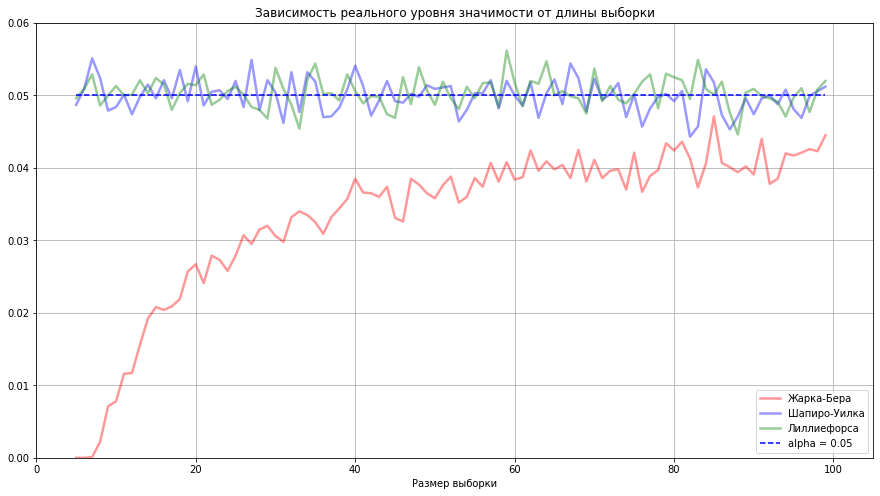

In [10]:
plt.figure(figsize=(15, 8))
grid=np.arange(5,100)
plt.plot(grid, np.mean(is_reject_ber,axis = 1), alpha=0.4, color='red', linewidth=2.5, label='Жарка-Бера')
plt.plot(grid, np.mean(is_reject_shapiro,axis = 1), alpha=0.4, color='blue', linewidth=2.5, label='Шапиро-Уилка')
plt.plot(grid, np.mean(is_reject_lili, axis = 1), alpha=0.4, color='green', linewidth=2.5, label='Лиллиефорсa')
plt.plot(grid, [0.05 for _ in range(95)], 'b--', label = 'alpha = 0.05')

plt.legend()
plt.xlim((0, 105))  
plt.ylim((0,0.06))
plt.xlabel('Размер выборки') 
plt.title('Зависимость реального уровня значимости от длины выборки')
plt.grid()
plt.show()

Какой можно сделать вывод?

**При заданном количестве выборок реальные уровни значимости критериев  Шапиро-Уилк и Лилиефорса осциллируют близи 0.05 и мало зависят от размера выборки, а критерия Жарка-Бера ниже 0.05 и стремится к этому значению с ростом размера выборки.**

**2.** Аналогичным образом можно вычислять мощность критерия. Вычислите мощности критериев для размеров выборки от 5 до 100, если альтернативная гипотеза заключается в том, что выборка имеет стандартное распределение Коши. Иначе говоря, для критерия $S$ надо приближенно посчитать $\beta_S(\mathsf{P})$, где $\mathsf{P}$ — стандартное распределение Коши.

Нарисуйте на одном графике зависимость мощности критерия от размера выборки для каждого критерия. Не забудьте добавить легенду и подписать оси.


In [12]:
max_sample_size = 100
sample_count = 10**4

b_s_reject_ber = np.zeros((max_sample_size - 5, sample_count))
b_s_reject_shapiro = np.zeros((max_sample_size - 5, sample_count))
b_s_reject_lili = np.zeros((max_sample_size - 5, sample_count))

# tqdm показывает, сколько еще времени будет выполняться цикл и сколько прошло
for i in tqdm(range(5, max_sample_size)): #проверяем для выборок разных размеров 
    for j in range(sample_count):# для каждого размера надо пройти все генерации
        sample = sps.cauchy().rvs(size = i)
        b_s_reject_ber[i-5, j] = zero2one(sps.jarque_bera(sample)[1])
        b_s_reject_shapiro[i-5, j] = zero2one(sps.shapiro(sample)[1])
        b_s_reject_lili[i-5, j] = zero2one(sps.kstest(sample, 'norm')[1])

  0%|          | 0/95 [00:00<?, ?it/s]

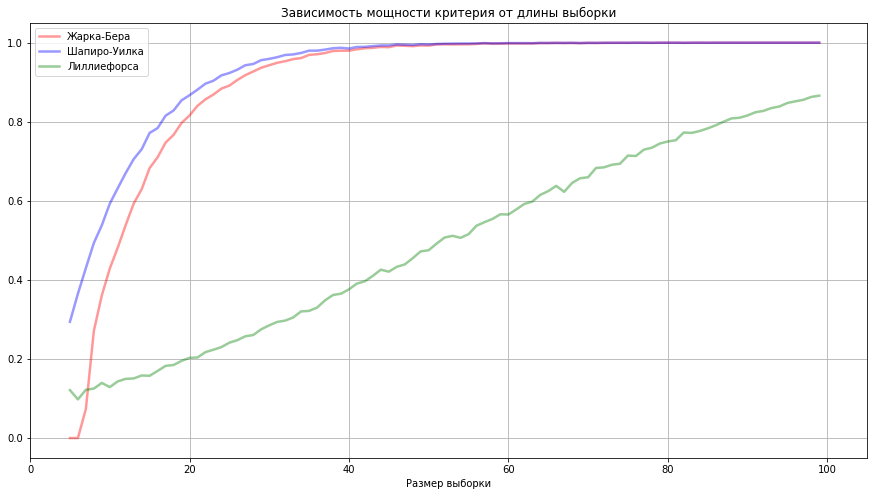

In [14]:
plt.figure(figsize=(15, 8))
grid=np.arange(5,100)
plt.plot(grid, np.mean(b_s_reject_ber,axis = 1), alpha=0.4, color='red', linewidth=2.5, label='Жарка-Бера')
plt.plot(grid, np.mean(b_s_reject_shapiro,axis = 1), alpha=0.4, color='blue', linewidth=2.5, label='Шапиро-Уилка')
plt.plot(grid, np.mean(b_s_reject_lili, axis = 1), alpha=0.4, color='green', linewidth=2.5, label='Лиллиефорсa')

plt.legend()
plt.xlim((0, 105))  
plt.xlabel('Размер выборки') 
plt.title('Зависимость мощности критерия от длины выборки')
plt.grid()
plt.show()

Сделайте вывод. Какой критерий является наиболее мощным при данной альтернативе?

**Наиболее мощным является критерий Шапиро-Уилка, он набирает большую мощность при относительно малых размерах выборки. Менее мощный - критерий Жарка - Бера, хуже всех критерий Лилиефорса, он менее всего чувствителен к различиям между распределением Коши и нормальным (на хвостах), сильнее зависит от размера выборки.**

**3*.** (4 балла) Распределение [Стьюдента](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%A1%D1%82%D1%8C%D1%8E%D0%B4%D0%B5%D0%BD%D1%82%D0%B0) является в некотором смысле обобщением нормального распределения (при бесконечном количестве степеней свободы) и распределения Коши (при одной степени свободы). 

Постройте на одном графике графики плотности распределения Коши, распределения Стьюдента с 1, 5, 10 степенями свободы и стандартного нормального распределения. Как меняется форма графика распределения Стьюдента с изменением количества степеней свободы? 

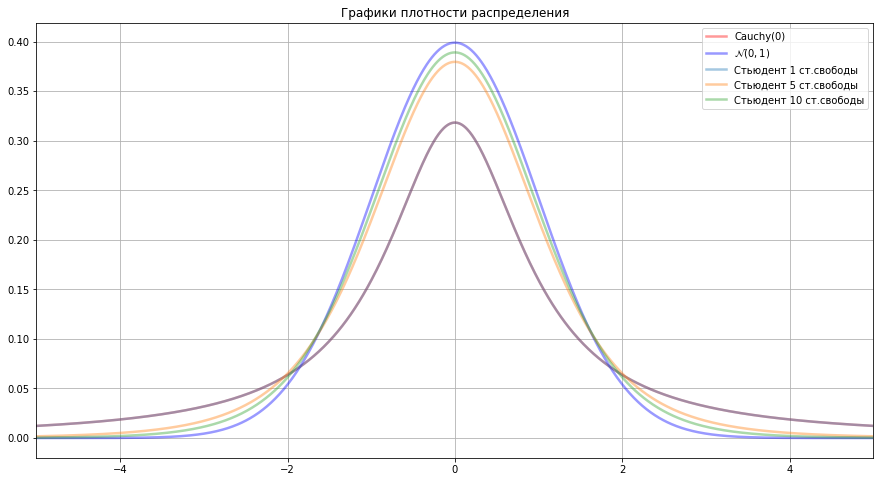

In [15]:
plt.figure(figsize=(15, 8))
grid=np.linspace(-5,5,1000)

plt.plot(grid, sps.cauchy().pdf(grid), alpha=0.4, color='red', linewidth=2.5, label='Cauchy(0)')
plt.plot(grid, sps.norm().pdf(grid), alpha=0.4, color='blue', linewidth=2.5, label='$\mathcal{N}(0,1)$')
plt.plot(grid, sps.t(df = 1).pdf(grid), alpha=0.4, linewidth=2.5, label='Cтьюдент 1 ст.свободы')
plt.plot(grid, sps.t(df = 5).pdf(grid), alpha=0.4,  linewidth=2.5, label='Cтьюдент 5 ст.свободы')
plt.plot(grid, sps.t(df = 10).pdf(grid), alpha=0.4,  linewidth=2.5, label='Cтьюдент 10 ст.свободы')

plt.legend()
plt.xlim((-5, 5))   
plt.title('Графики плотности распределения')
plt.grid()
plt.show()

**Видим, что при увеличении степеней свободы распределение Стьюдента стремится к нормальному, при 1 cтепени свободы совпадает со стандартным распределением Коши(наложение линий создает коричневый оттенок). Заметим, что характерные "хвосты" при увеличении степеней свободы тоже становятся менее заметными, "тяжелыми", что и следовало ожидать.**

Посчитайте приближенно мощности критериев для выборки размера 50 если альтернатива заключается в том, что выборка имеет распределение Стьюдента. Поскольку мощность критерия является функцией от распределения из альтернативной гипотезы, вам нужно реализовать функцию (например, принимающую количество степенй свободы). Посчитайте её значения для целых значений степени свободы от 1 до 10.

Нарисуйте на одном графике зависимость мощности критерия от **количества степеней свободы** для каждого из трех критериев. Не забудьте добавить легенду и подписать оси.

In [37]:
def strength(sample_size = 50, svob = np.array([1,]), sample_count = 10**4):
  b_st_reject_ber = np.zeros((svob.shape[0], sample_count))
  b_st_reject_shapiro = np.zeros((svob.shape[0], sample_count))
  b_st_reject_lili =  np.zeros((svob.shape[0], sample_count))
  for stepen in tqdm(svob):
    for i in range(sample_count):
      sample = sps.t(df = stepen).rvs(sample_size)
      b_st_reject_ber[stepen-1,i] = zero2one(sps.jarque_bera(sample)[1])
      b_st_reject_shapiro[stepen-1,i] = zero2one(sps.shapiro(sample)[1])
      b_st_reject_lili[stepen-1,i] = zero2one(sps.kstest(sample, 'norm')[1])
  return [b_st_reject_ber, b_st_reject_shapiro, b_st_reject_lili]

In [38]:
svobod = np.arange(1,11)

res = strength(svob = svobod)

  0%|          | 0/10 [00:00<?, ?it/s]

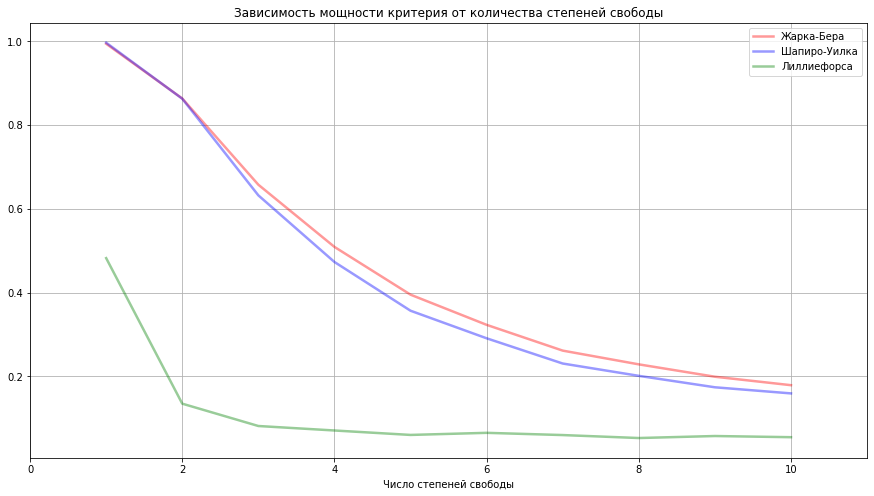

In [42]:

plt.figure(figsize=(15, 8))
grid=np.arange(1,11)
plt.plot(grid, np.mean(res[0],axis = 1), alpha=0.4, color='red', linewidth=2.5, label='Жарка-Бера')
plt.plot(grid, np.mean(res[1], axis = 1), alpha=0.4, color='blue', linewidth=2.5, label='Шапиро-Уилка')
plt.plot(grid, np.mean(res[2], axis = 1), alpha=0.4, color='green', linewidth=2.5, label='Лиллиефорсa')

plt.legend()
plt.xlim((0, 11))  
plt.xlabel('Число степеней свободы') 
plt.title('Зависимость мощности критерия от количества степеней свободы')
plt.grid()
plt.show()

Сделайте вывод относительно мощности критерия при разных распределениях из альтернативы. Объясните наблюдаемую зависимость мощности от степени свободы.

**При увеличении числа степеней свободы распределение Стьюдента все более похоже на нормальное: критериям проверки нормальности в принципе будет тяжелее работать. При этом критерий Жарка-Бера является наиболее мощным: даже при больших степенях он пытается различать распределения, он сильнее чем критерий Шапиро - Уилка. Критерий Лилиенфорса является самым слабым: мощность изначально мала и слабо зависит от степеней свободы, то есть опять нечувствительна к поведению на хвостах**

__________________
### Задача 4. (основной поток, 12 баллов)


Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine">`wine dataset`</a>. Для этого зайдите в папку "DataFolder" и скачайте файл `wine.data`. Читать файл можно с помощью функции `read_csv`.  В этом датасете представлены различные характеристики вин. Возьмите все колонки, кроме `Class` (класс вина). В дальнейшем, как и раньше, будем называть колонки признаками.

**Поймем как называются колонки, потому что из таблицы wine.data непонятно какому признаку какие числа относятся**

In [50]:
with open('wine.names') as file:
  for line in file:
    print(line)

1. Title of Database: Wine recognition data

	Updated Sept 21, 1998 by C.Blake : Added attribute information



2. Sources:

   (a) Forina, M. et al, PARVUS - An Extendible Package for Data

       Exploration, Classification and Correlation. Institute of Pharmaceutical

       and Food Analysis and Technologies, Via Brigata Salerno, 

       16147 Genoa, Italy.



   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au

   (c) July 1991

3. Past Usage:



   (1)

   S. Aeberhard, D. Coomans and O. de Vel,

   Comparison of Classifiers in High Dimensional Settings,

   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of

   Mathematics and Statistics, James Cook University of North Queensland.

   (Also submitted to Technometrics).



   The data was used with many others for comparing various 

   classifiers. The classes are separable, though only RDA 

   has achieved 100% correct classification.

   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed dat

In [149]:
chosen_columns= ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium','Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
data = pd.read_csv("wine.data")
data = data.drop('1',axis = 1)  #первый столбец - Class, избавимся от него
x = data.columns #в название столбцов съехали данные
data.columns = [name for name in chosen_columns] #переобозначаем столбцы
new_line = {}
for count, key in enumerate(chosen_columns):
  new_line[key] = float(x[count])
data = data.append(new_line, ignore_index=True) #добавляем утерянные данные
data

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
2,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
3,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
4,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
174,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
175,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0
176,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560.0


Для каждого из признаков нарисуйте Q-Q plot. Для наглядности и экономии места рисуйте графики в несколько строк и столбцов, используя `plt.subplot`.

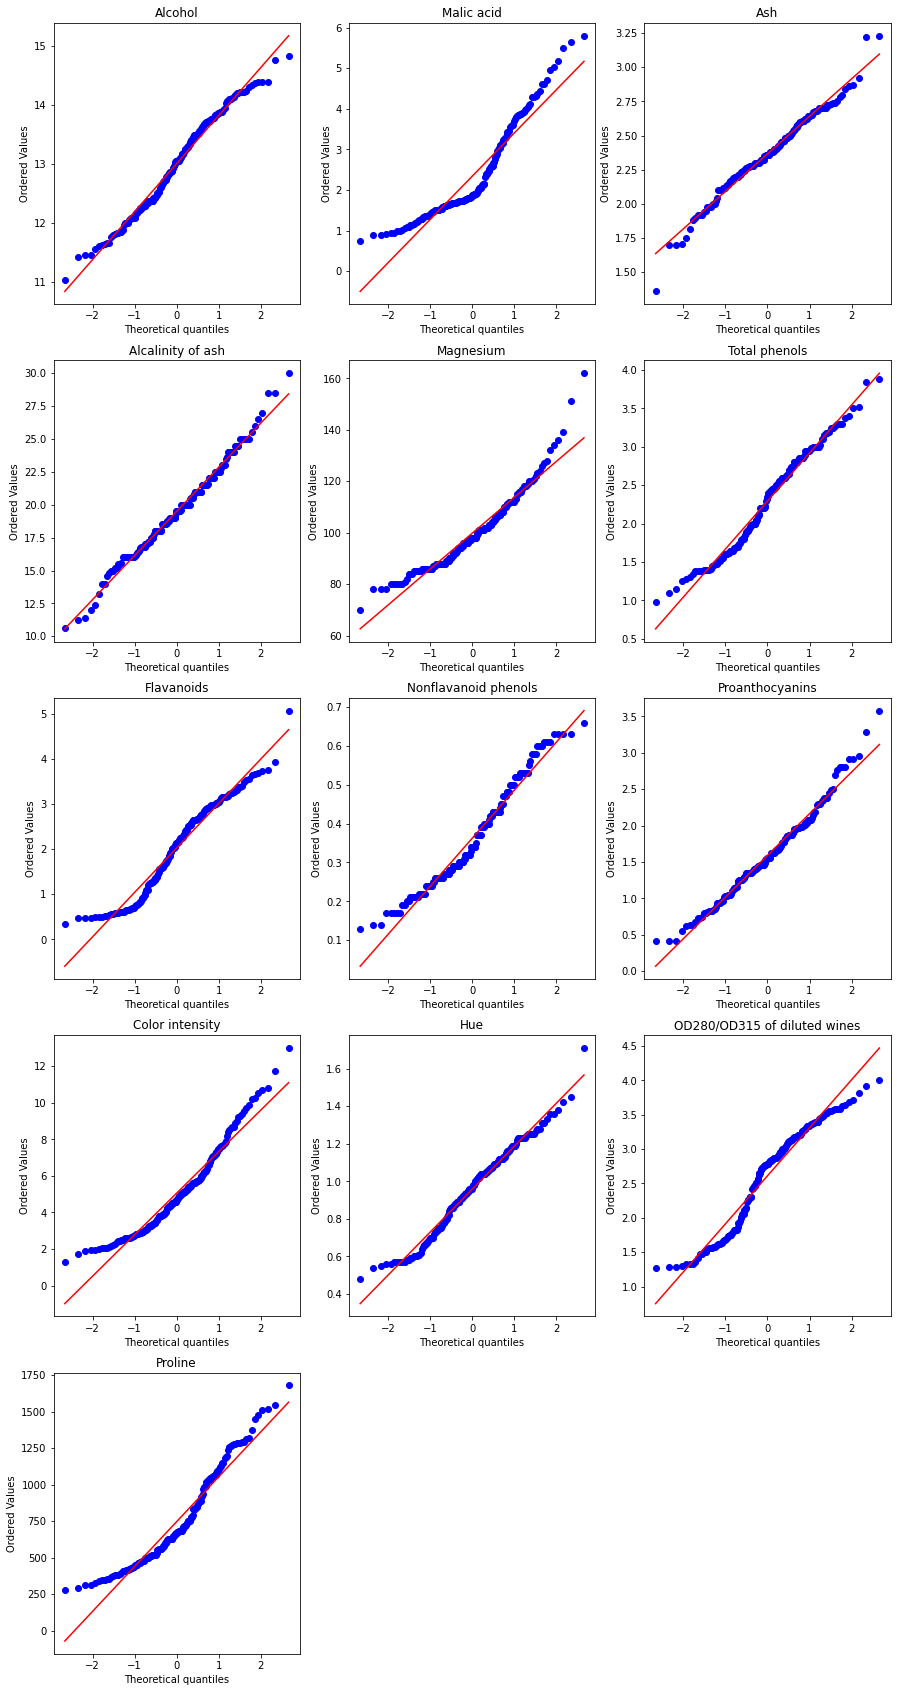

In [117]:
plt.figure(figsize=(15,30))
for count, column in enumerate(data.columns):
  ax = plt.subplot(5, 3, count+1)
  sps.probplot(data[column], plot=ax)
  plt.title(column)


Для каких признаков можно говорить об их нормальности и почему?

**Ответ:** 

**Признак тем нормальнее, чем ближе значения на Q-Q плоте к линии, причем отклонениями от прямой в начале и конце данных можно пренебречь. Будем говорить о нормальности признаков: Alcohol, Ash, Alcalinity of ash, Proanthocyanins, Hue.**

Проверьте нормальность каждого признака статистическими критериями. Прежде чем выполнить следующую часть задачи, ответьте на вопросы. 

Для каждого признака используйте несколько критериев проверки нормальности. Какие критерии вы будете использовать?

**Ответ:** 

**В общем случае для нормального распределения можно использовать критерии: Шапиро-Уилка, Жарка-Бера, Лилиенфорса, Пирсона, Андерсона-Дарлинга.**

**Воспользуемся критериями Шапиро-Уилка и Жарка-Бера: выше было показано, что они мощные и хорошо проверяют нормальность (критерием Андерсона - Дарлинга здесь пользоваться не буду, так как его результат неочевидно интерпретируется, а тут уже есть некоторый базовый анализ Q-Q)**


Результаты критериев нужно обработать с помощью *одной* процедуры множественной проверки гипотез для всех признаков и всех критериев сразу. Почему так нужно делать?

**Ответ:** 

**Критерий согласия - реализация гипотезы о некотором распределении, при множественной проверке гипотез необходимо делать поправки на FDR, FWER. Так как признаки уже отсеяны, требуется сделать контроль только FWER.**

**Одна процедура, потому что мы хотим получить вероятность групповой ошибки первого рода не более 0.05, то есть чтобы из всех признаков мы ошибочно признали не нормально распределенными не слишком много признаков.**

Какой метод для контроля FWER стоит применить и почему?

**Ответ:** 

**Выбранные признаки в принципе могут оказаться зависимыми(например Ash и Alcalinity of ash $⇒$ методом Шидака, Шидака-Холма пользоваться не надо), в таком случае самым мощным методом является метод Холма им и воспользуемся.**

Как понять из результата процедуры множественной проверки гипотез, нормальность каких признаков следует отклонить?

**Ответ:** 
**У нас есть гипотеза $H_0$, что признаки имеют нормальное распределение, у соотвествующего критерия есть некоторый уровень значимости $\alpha$, тогда сравнивая скорректированные p-value с ним можем сказать отвергаетcя гипотеза или нет.**

Если нормальность не отклоняется, что можно сказать про выборку? Ответ находится в презентации с лекции.

**Ответ:** 

**Если не нашли отклонений с гипотезой, то не принимаем гипотезу, а говорим, что выборка на данный момент согласуется с гипотезой. Либо мощности критериев не хватило чтобы найти отклонения от нормальности, как в случае критерия Лилиефорса и распределения Коши.**

Реализуйте данную схему. Предварительно соберите p-value всех критериев в таблицу. 

Функция `multipletests` принимает только одномерные массивы, поэтому для полученной `numpy`-таблицы нужно воспользоваться методом `ravel`. Результаты соберите обратно в таблицу с помощью метода `reshape`, которому необходимо передать размерности таблицы. Для наглядности сделайте таблицу с помощью `pandas.DataFrame`. В качестве названий строк используйте названия признаков, а названий столбцов — используемые критерии. В таблице должны присутстововать как значения p-value, так и результат проверки (`True` в случае отвержения).

In [148]:
criterion = pd.DataFrame({'Признаки': chosen_columns})
criterion['Жарка-Бера'] = [sps.jarque_bera(data[feature])[1] for feature in criterion['Признаки']]
criterion['Шапиро-Уилка'] = [sps.shapiro(data[feature])[1] for feature in criterion['Признаки']]

res = multipletests(np.ravel([np.array(criterion['Жарка-Бера']), np.array(criterion['Шапиро-Уилка'])]), method = 'holm')
res = res[0].reshape((2,13))
criterion['FWER Жарка-Бера'], criterion['FWER Шапиро-Уилка'] = res[0], res[1]
criterion

,Признаки,Жарка-Бера,Шапиро-Уилка,FWER Жарка-Бера,FWER Шапиро-Уилка
0,Alcohol,6.106775e-02,2.005172e-02,False,False
1,Malic acid,1.115426e-07,2.945930e-10,True,True
2,Ash,8.485917e-03,3.868526e-02,False,False
3,Alcalinity of ash,2.509338e-01,2.638694e-01,False,False
4,Magnesium,6.883383e-15,6.345416e-07,True,True
5,Total phenols,6.312188e-02,4.395752e-03,False,False
6,Flavanoids,5.273120e-02,1.679064e-05,False,True
7,Nonflavanoid phenols,1.071359e-02,1.055266e-04,False,True
8,Proanthocyanins,7.840977e-03,1.445338e-02,False,False
9,Color intensity,1.092262e-05,9.229477e-07,True,True


Для каких признаков нормальность не отвергается?

**Ответ:** 

**В таблице True соответствует гипотезам, которые надо отвергнуть при заданном уровне $\alpha = 0.05$. Не отвергаются: Alcohol, Ash, Alcality of ash, Total phenols, Proanthocyanins, Hue. В случае неоднозначных результатов, когда у признаков есть и True и False полагаемся на результат Шапиро-Уилка, как более мощного критерия.** 

**Вывод:** 

**Визуальный анализ Q-Q плотов признаков дал основание предполагать, что только у пяти признаков распределение нормальное, при дальнейшей проверке эти гипотезы не отверглись. При этом изначально назвать распределение Total phenols нормальным было сложно, однако при численных проверках критериев удалось избежать потери информации по этому распределению.**

**То есть действительно полагаться на Q-Q плот нельзя, использовать его надо только как оценочный вспомогательный метод.**

**Также можно заметить, что до МПГ критерии этих признаков должны были отвергнуться: соответсвующие p-value < $\alpha = 0.05$. Т.о. МПГ минимизировал возможность реализовать групповую ошибку первого рода.**